## 설치
```
pip3 install fbprophet
```


## Model 구성
- 3개의 컴포넌트
- 1) Growth
- 2) Seasonality
- 3) Holidays(Events)

$$y(t)=g(t)+s(t)+h(t)+error$$

- ARIMA 같은 시계열 모델들이 시간에 종속적인 구조를 가지는데, prophet은 종속적이지 않음
    - 대신 Curve Fitting으로 문제를 해결
    - 장점
        - 모형이 유연함
        - 측정하는 시간이 일저한 주기를 가질 필요가 없음, 빈 구간을 interpolate하지 않아도 됨
        - 학습 속도가 빠름
        - 직관적으로 이해할 수 있는 파라미터를 통해 모형을 조정할 수 있음

### Growth
- Linear Growth(+Change Point)
    - Change Point는 자동으로 탐지
    - 예측할 때는 특정 지점이 change point인지 여부를 확률적으로 결정
    
- Non-Linear Growth(Logistic Growth)
    - 자연적 상한성이 존재하는 경우, Capacity가 있음
    - Capacity는 시간에 따라 변할 수 있음

### Seasonality
- 사용자들의 행동 양식으로 주기적으로 나타나는 패턴
    - 방학, 휴가, 온도, 주말 등등
- Fourier Series를 이용해 패턴의 근사치를 찾음

### Holidays
- 주기성을 가지진 않지만 전체 추이에 큰 영향을 주는 이벤트가 존재
- 이벤트의 효과는 독립적이라 가정
- 이벤트 앞뒤로 window 범위를 지정해 해당 이벤트가 미치는 영향의 범위를 설정할 수 있음

## Model Fitting
- Stan을 통해 모델을 학습
    - probabilistic programming language for statistical inference
- 2가지 방식
    - MAP (Maximuam A Posteriori) : Default, 속도가 빠름
    - MCMC (Markov Chain Monte Carlo) : 모형의 변동성을 더 자세히 살펴볼 수 있음

- Analyst in the loop Modeling
    - 통계적 지식이 없어도 직관적 파라미터를 통해 모형을 조정할 수 있음
    - 일반적인 경우 기본값만 사용해도 높은 성능을 가능
    - 내부가 어떻게 동작하는지 고민할 필요가 없음
    - 요소
        - Capacities : 시계열 데이터 전체의 최대값
        - Change Points : 추세가 변화하는 시점
        - Holidays & Seasonality : 추세에 영향을 미치는 시기적 요인
        - Smoothing : 각각의 요소들이 전체 추이에 미치는 영향의 정도

### 언제 사용해야 할까?
- 많은 시계열 데이터 (연단위 이상 추천)
- 불규칙적으로 일어나지만 사전에 시점을 알고 있는 이벤트가 있는 경우
    - 한국시리즈, 크리스마스
- 결측치가 어느정도 존재하거나 아웃라이어가 많은 경우
- 특정한 이벤트로 인해 장기적 추이가 변할 수 있는 경우
    - 신제품 출시, 디자인 변경
- 지표가 선형으로 증가하지 않을 경우
    - 증가할 수 있는 지표의 치ㅗ대치가 존재하고 이를 알고있는 경우

In [19]:
from fbprophet import Prophet
%config InlineBackend.figure_format = 'retina'

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("./data/example_wp_log_peyton_manning.csv")

In [8]:
df.head(3)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677


In [9]:
m = Prophet(daily_seasonality=True)

In [29]:
Prophet?

In [11]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [13]:
forecast = m.predict(future)

In [32]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.188560,7.472689,8.921501,6.842721,7.584742,1.017937,1.017937,1.017937,0.048276,0.048276,0.048276,0.969662,0.969662,0.969662,0.0,0.0,0.0,8.206497
3266,2017-01-16,7.187532,7.835842,9.276909,6.839834,7.585662,1.343991,1.343991,1.343991,0.352295,0.352295,0.352295,0.991696,0.991696,0.991696,0.0,0.0,0.0,8.531523
3267,2017-01-17,7.186504,7.649349,9.053052,6.836947,7.587517,1.132426,1.132426,1.132426,0.119639,0.119639,0.119639,1.012787,1.012787,1.012787,0.0,0.0,0.0,8.318930
3268,2017-01-18,7.185477,7.409062,8.922735,6.834155,7.587927,0.966066,0.966066,0.966066,-0.066664,-0.066664,-0.066664,1.032730,1.032730,1.032730,0.0,0.0,0.0,8.151543
3269,2017-01-19,7.184449,7.445664,8.928081,6.831499,7.588003,0.979028,0.979028,0.979028,-0.072254,-0.072254,-0.072254,1.051282,1.051282,1.051282,0.0,0.0,0.0,8.163477


In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206497,7.472689,8.921501
3266,2017-01-16,8.531523,7.835842,9.276909
3267,2017-01-17,8.318930,7.649349,9.053052
3268,2017-01-18,8.151543,7.409062,8.922735
3269,2017-01-19,8.163477,7.445664,8.928081


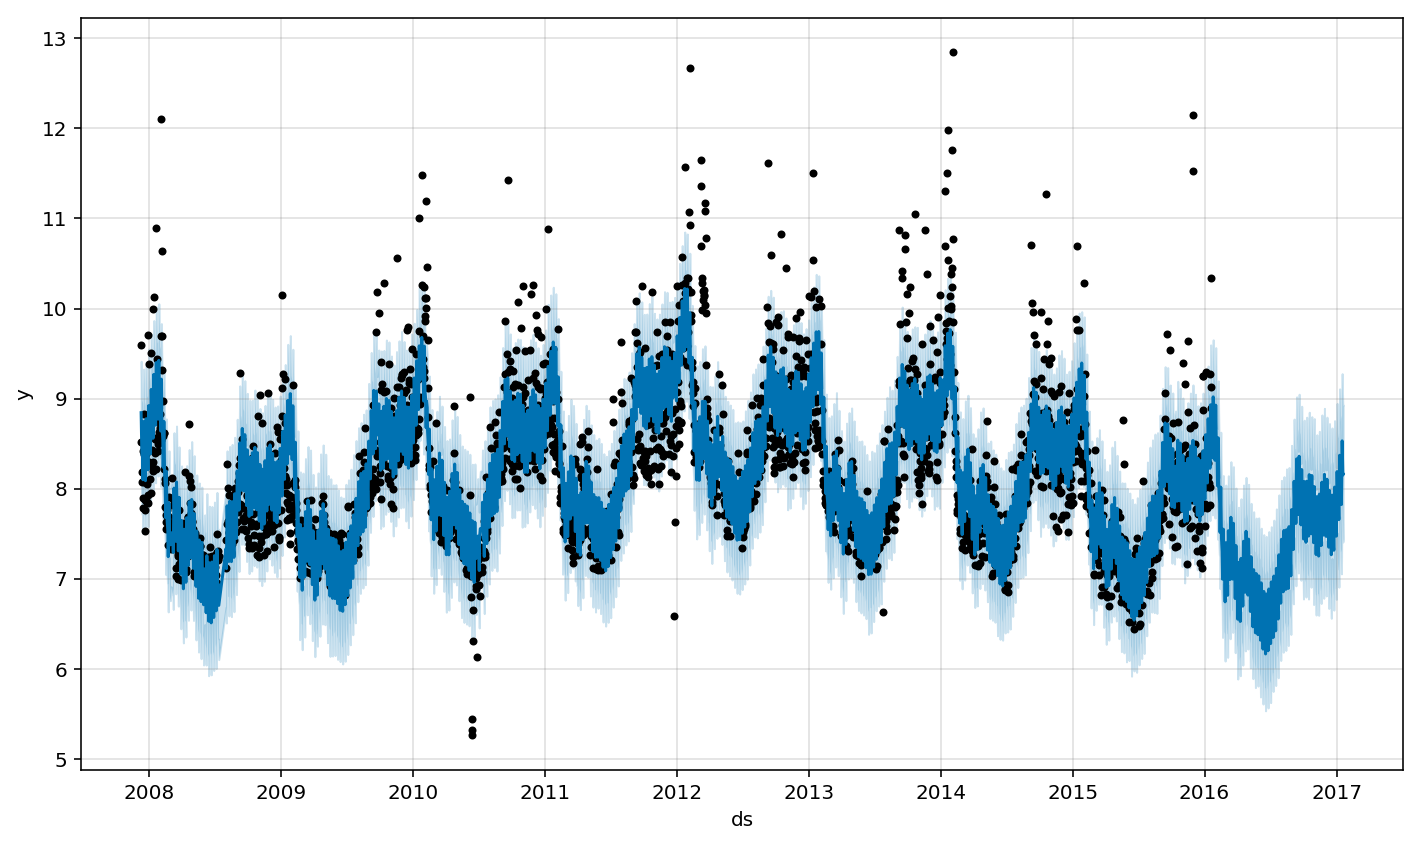

In [21]:
fig1 = m.plot(forecast)

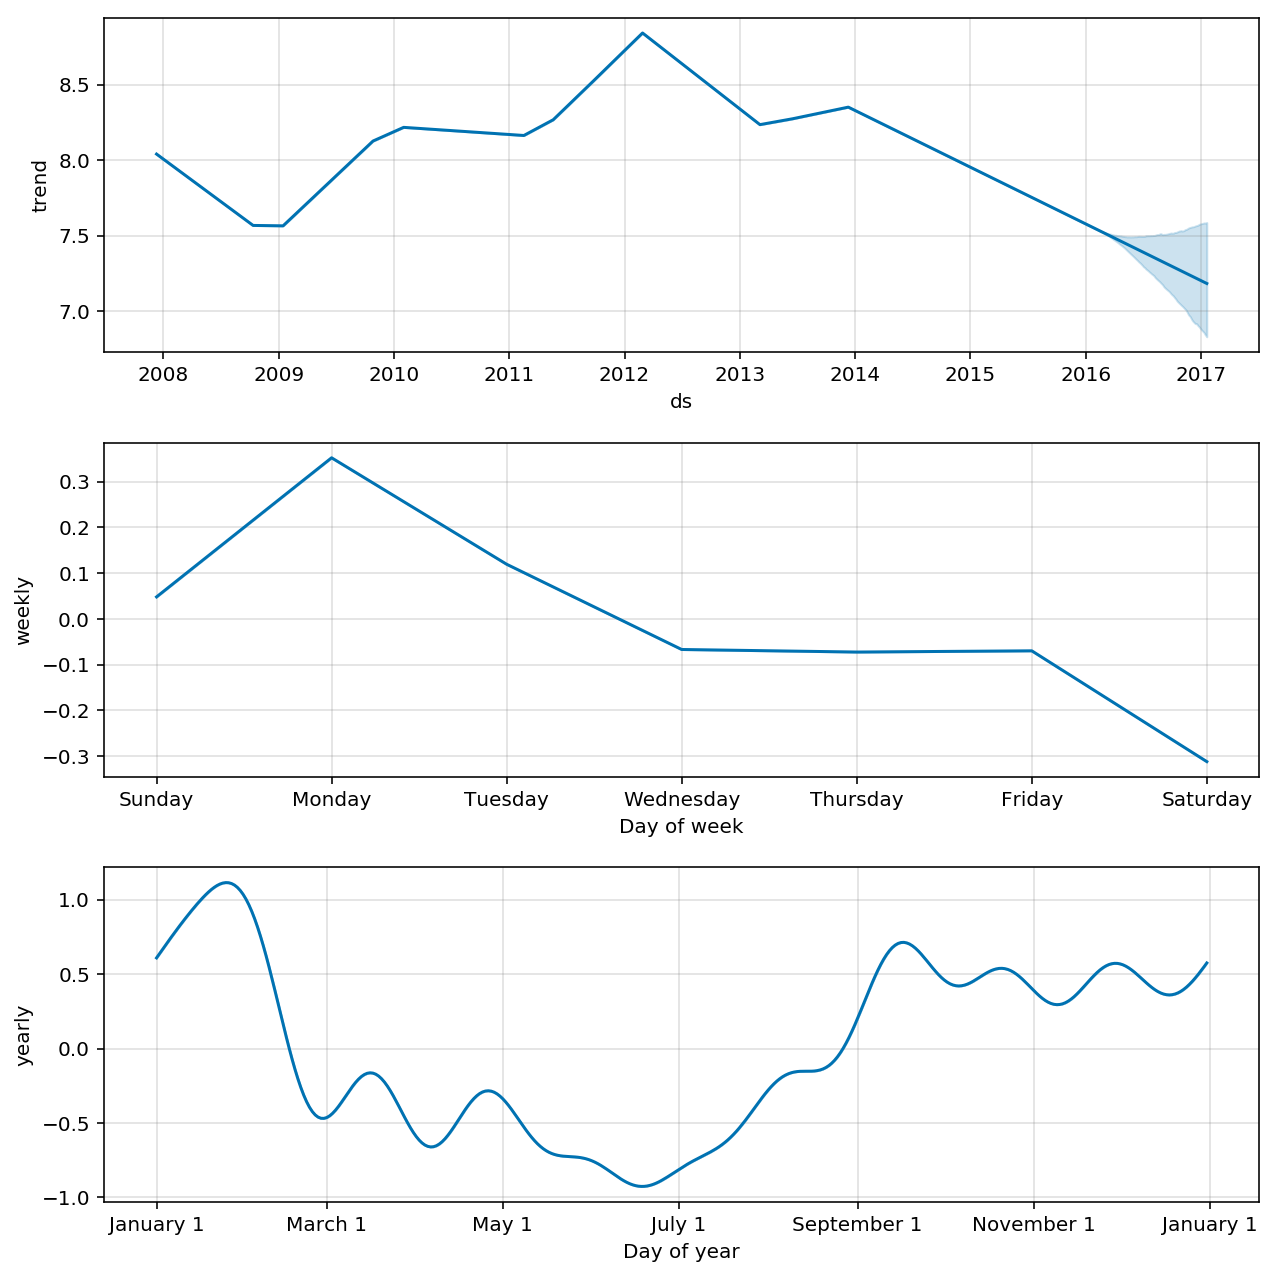

In [20]:
fig2 = m.plot_components(forecast)

## Forecast Growth

- Capacity 설정

In [22]:
df['cap'] = 8.5

In [23]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


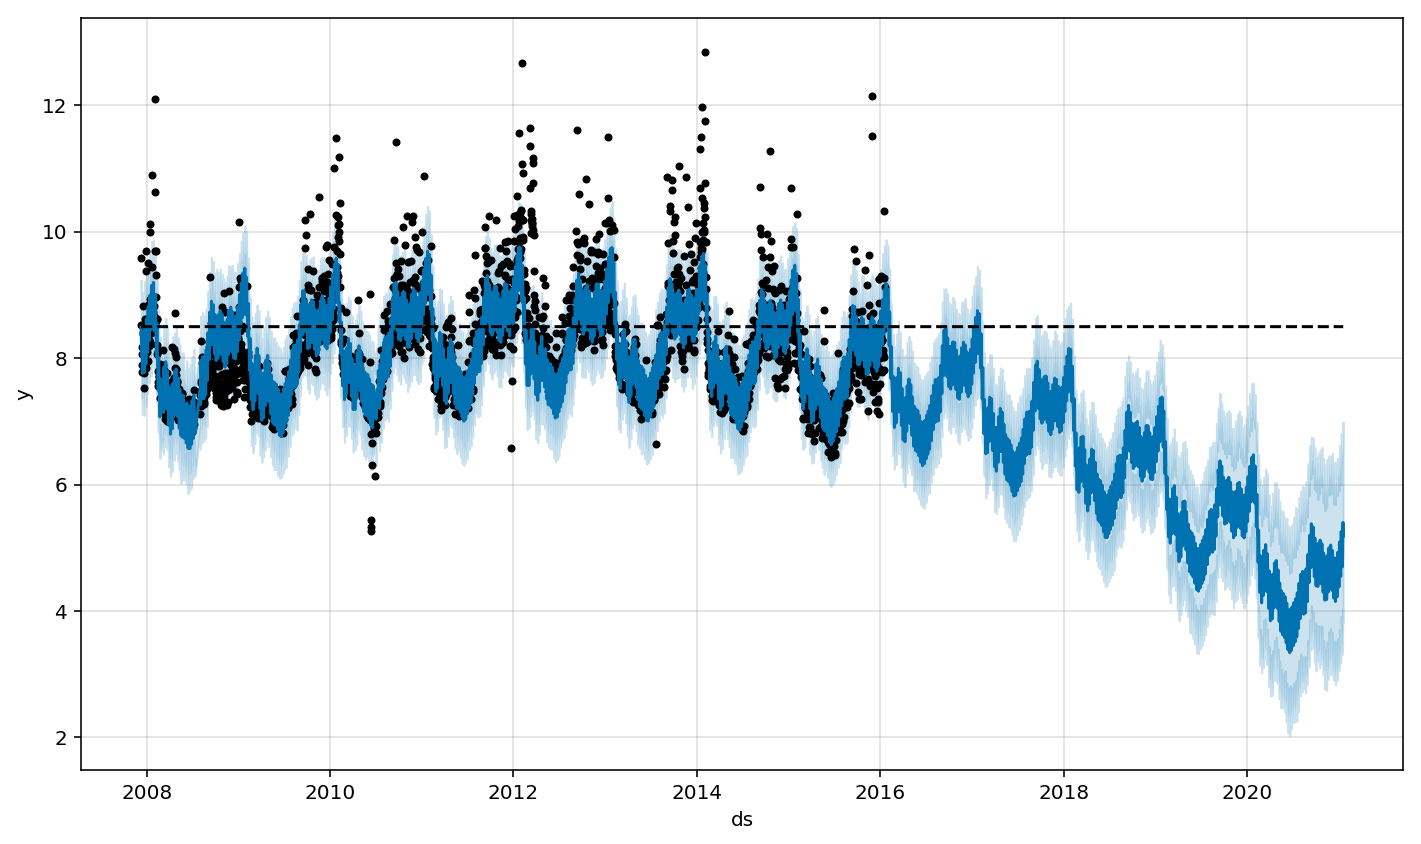

In [25]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

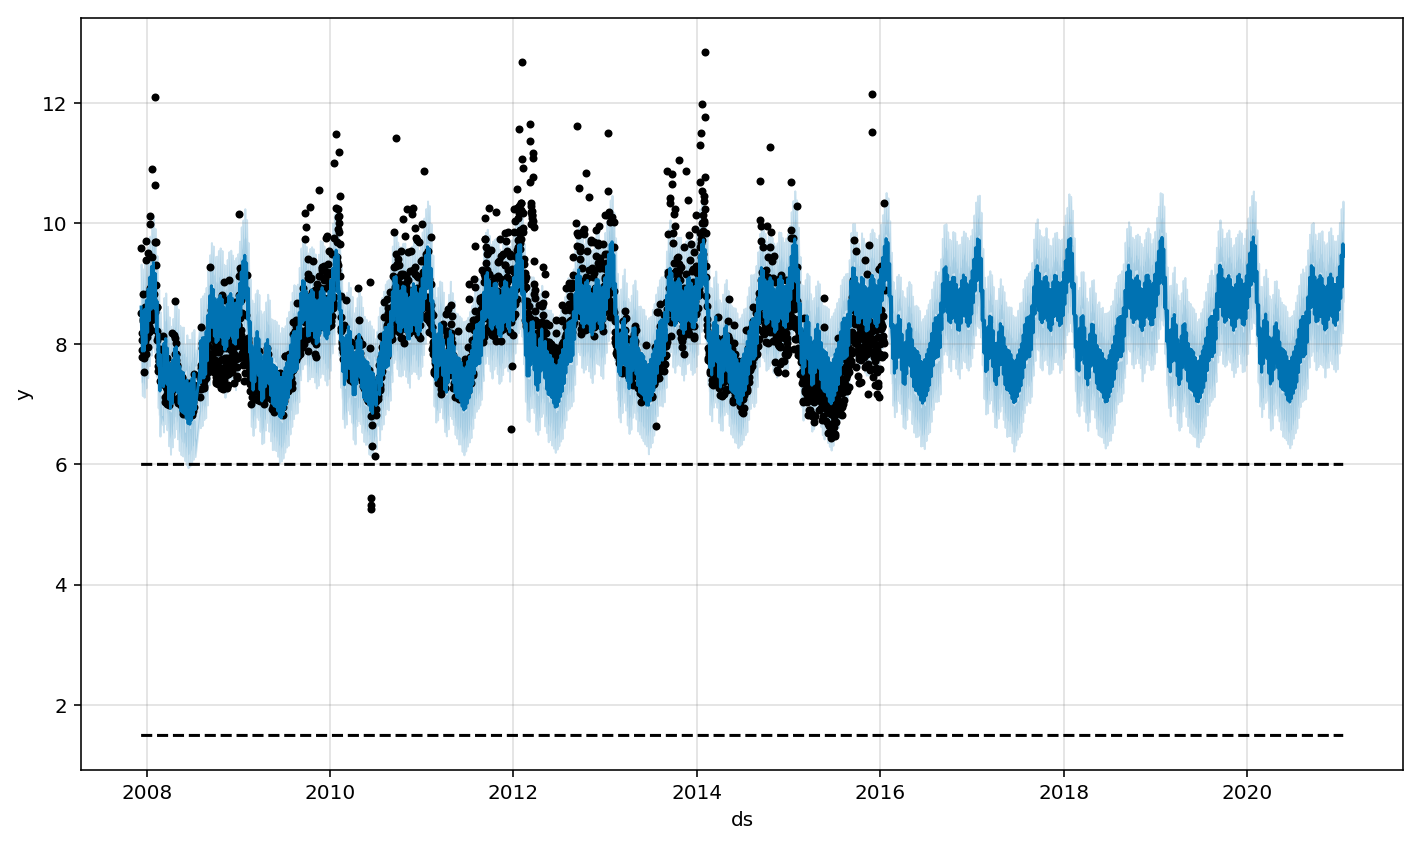

In [27]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)